# Procesamiento de datos utilizando python

##### `Procesamiento numérico`  


>`> Extracción de datos`

In [1]:
# Importando Librerias
import pandas as pd                 #Pandas
import matplotlib.pyplot as plt     #Matplot
import numpy as np                  #Numpy
import seaborn as sns               #seaborn
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow','black','white']

In [2]:
pd.set_option("display.max_rows",4)#Cantidad de filas a mostrar
pd.set_option("display.max_columns",13)#Cantidad de columnas a mostrar

`vistaexaminados y vistaasistencias`

In [16]:
json="https://tecnologica.utec.edu.sv/fica/services/vistaexaminados.php"
dfExam = pd.read_json(json)
dfAsis = pd.read_json('https://tecnologica.utec.edu.sv/fica/services/vistaasistencias.php')
dfAsis

,fecha,codigo,facultad,area,materia,seccion,horario,dias,Inscritos,Asistencia,Modalidad
0,2023-01-19,DPCM1-D,Facultad de Derecho,DERECHO,DERECHO PROCESAL CIVIL Y MERCANTIL I,1,06:30-08:00,Ma-Jue,75,70,EN LINEA
1,2023-01-19,ALG1-E,Facultad de Informática y Ciencias Aplicadas,INFORMATICA,ALGORITMOS I,6,06:30-08:00,Ma-Jue,44,26,PRESENCIAL
...,...,...,...,...,...,...,...,...,...,...,...
9378,2023-03-07,REA1-A,Facultad de Ciencias Sociales,ANTROPOLOGIA,REALIDAD NACIONAL,20,08:00-09:30,Ma-Jue,88,-1,PRESENCIAL
9379,2023-04-11,ALG1-E,Facultad de Informática y Ciencias Aplicadas,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,88,80,PRESENCIAL


>`> Limpieza de datos`

`vistaasistencias`

In [5]:
dfAsis.info()#sin valores nulos cantidad de registros son 9380 @ columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9380 entries, 0 to 9379
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   fecha       9380 non-null   object
 1   codigo      9380 non-null   object
 2   facultad    9380 non-null   object
 3   area        9380 non-null   object
 4   materia     9380 non-null   object
 5   seccion     9380 non-null   int64 
 6   horario     9380 non-null   object
 7   dias        9380 non-null   object
 8   Inscritos   9380 non-null   int64 
 9   Asistencia  9380 non-null   int64 
 10  Modalidad   9380 non-null   object
dtypes: int64(3), object(8)
memory usage: 806.2+ KB


In [4]:
# validando que seran utililes las columnas categoricas

cols_cat=['fecha', 'codigo', 'facultad', 'area', 'materia', 'seccion', 'horario',
       'dias', 'Modalidad']
for col in cols_cat:
  print(f'columna {col}: {dfAsis[col].nunique()} subniveles')
#si existiera un solo nivel no nos serviria para analizar pues no habria comparativa por 
#lo que las variables categoricas deben ser mayor a uno, en cambio si tienen demaciados 
#datos dependera como se realice el analisis para que nos sirva

columna fecha: 49 subniveles
columna codigo: 450 subniveles
columna facultad: 4 subniveles
columna area: 9 subniveles
columna materia: 423 subniveles
columna seccion: 26 subniveles
columna horario: 17 subniveles
columna dias: 14 subniveles
columna Modalidad: 2 subniveles


In [7]:
# Validadndo si las columnas numericas 
dfAsis.describe().head(8)#si la desviasion estandar es cero significa que todos los datos son iguales

,seccion,Inscritos,Asistencia
count,9380.000000,9380.000000,9380.000000
mean,2.773134,59.427079,48.705650
std,3.367513,31.304157,26.975018
min,1.000000,1.000000,-1.000000
25%,1.000000,35.000000,28.000000
50%,1.000000,56.000000,45.000000
75%,3.000000,82.000000,68.000000
max,27.000000,140.000000,131.000000


In [8]:
ModfColums=dfAsis.columns
ModfColums#mostrando columnas actuales

Index(['fecha', 'codigo', 'facultad', 'area', 'materia', 'seccion', 'horario',
       'dias', 'Inscritos', 'Asistencia', 'Modalidad'],
      dtype='object')

In [17]:
# utilizando el método rename para cambiar el nombre de las columnas
# dfAsis.rename(columns={"Inscritos": "inscritos", "Asistencia": "asistencia", "Modalidad": "modalidad"}, inplace=True)
dfAsis.rename(columns={"Inscritos": "inscritos", "Asistencia": "asistencia", "Modalidad": "modalidad"}, inplace=True)
# imprime los nombres de las columnas actualizadas
dfAsis.columns

Index(['fecha', 'codigo', 'facultad', 'area', 'materia', 'seccion', 'horario',
       'dias', 'inscritos', 'asistencia', 'modalidad'],
      dtype='object')

In [18]:
# Validando si existen en el dataframe filas repetidas

print(f"tamaño del DF antes de eliminar filas repetidas: {dfAsis.shape}")
dfAsis.drop_duplicates(inplace=True)
print(f'tamaño del DF antes de eliminar filas repetidas: {dfAsis.shape}')

tamaño del DF antes de eliminar filas repetidas: (9380, 11)
tamaño del DF antes de eliminar filas repetidas: (9380, 11)


In [20]:
# Eliminando valores mayores a 130 usando el "outler"

print(f"tamaño del DF antes de eliminar filas repetidas: {dfAsis.shape}")
dfAsis=dfAsis[dfAsis['asistencia']<=130]
print(f'tamaño del DF antes de eliminar filas repetidas: {dfAsis.shape}')
#9380 rows - 9378 rows = 2 rows eliminados por ser mayores a 130

tamaño del DF antes de eliminar filas repetidas: (9380, 11)
tamaño del DF antes de eliminar filas repetidas: (9378, 11)


In [21]:
#Seccionando todos los datos unicos para tener una mejor visualizacion
transAsis = dfAsis['asistencia']
registros_unicos = sorted(transAsis.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')

Sección 1:
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
---
Sección 2:
[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]
---
Sección 3:
[99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130]
---


In [9]:
#haciendo busqueda de un registro; nos damos cuenta que hay registros con espacios en blanco
datos_filtrados = dfAsis[dfAsis['codigo'] == 'EPRO-AC  ']
print(datos_filtrados)

           fecha     codigo                       facultad          area   
138   2023-01-19  EPRO-AC    Facultad de Ciencias Sociales  ANTROPOLOGIA  \
205   2023-01-19  EPRO-AC    Facultad de Ciencias Sociales  ANTROPOLOGIA   
...          ...        ...                            ...           ...   
9224  2023-03-06  EPRO-AC    Facultad de Ciencias Sociales  ANTROPOLOGIA   
9315  2023-03-07  EPRO-AC    Facultad de Ciencias Sociales  ANTROPOLOGIA   

     materia  seccion      horario    dias  Inscritos  Asistencia   Modalidad  
138    ÉTICA        7  17:00-18:30  Ma-Jue        129         110    EN LINEA  
205    ÉTICA        2  06:30-08:00  Ma-Jue         36           0  PRESENCIAL  
...      ...      ...          ...     ...        ...         ...         ...  
9224   ÉTICA        8  18:40-20:10  Lu-Mie        128         100    EN LINEA  
9315   ÉTICA        2  06:30-08:00  Ma-Jue         36          33  PRESENCIAL  

[124 rows x 11 columns]


In [22]:
# limpiar espacios en blancos
# Iterarando sobre las columnas del DataFrame
for columna in dfAsis.columns:
    # Verificando si las columnas son de tipo string
    if dfAsis[columna].dtype == 'object':
        # Eliminando los espacios en blanco de cada registro en las columnas coinsidentes
        dfAsis.loc[:, columna] = dfAsis[columna].str.strip()        

In [12]:
datos_filtrados = dfAsis[dfAsis['codigo'] == 'EPRO-AC']
print(datos_filtrados)#Verificando que ya no hayan espacios en blancos usando filtro 'EPRO-AC'

           fecha   codigo                       facultad          area   
138   2023-01-19  EPRO-AC  Facultad de Ciencias Sociales  ANTROPOLOGIA  \
205   2023-01-19  EPRO-AC  Facultad de Ciencias Sociales  ANTROPOLOGIA   
...          ...      ...                            ...           ...   
9224  2023-03-06  EPRO-AC  Facultad de Ciencias Sociales  ANTROPOLOGIA   
9315  2023-03-07  EPRO-AC  Facultad de Ciencias Sociales  ANTROPOLOGIA   

     materia  seccion      horario    dias  Inscritos  Asistencia   Modalidad  
138    ÉTICA        7  17:00-18:30  Ma-Jue        129         110    EN LINEA  
205    ÉTICA        2  06:30-08:00  Ma-Jue         36           0  PRESENCIAL  
...      ...      ...          ...     ...        ...         ...         ...  
9224   ÉTICA        8  18:40-20:10  Lu-Mie        128         100    EN LINEA  
9315   ÉTICA        2  06:30-08:00  Ma-Jue         36          33  PRESENCIAL  

[124 rows x 11 columns]


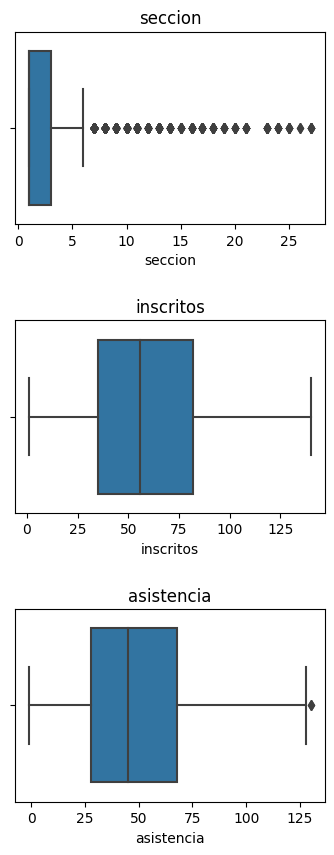

In [24]:
#validando valores extremos de las columnas numericas

cols_num=['seccion', 'inscritos', 'asistencia']
fig, ax=plt.subplots(nrows=3,ncols=1,figsize=(4,10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col,data=dfAsis,ax=ax[i])
    ax[i].set_title(col)

In [25]:
transFact=dfAsis.facultad
list(transFact.drop_duplicates())#virificando registros unicos

['Facultad de Derecho',
 'Facultad de Informática y Ciencias Aplicadas',
 'Facultad de Ciencias Empresariales',
 'Facultad de Ciencias Sociales']

In [26]:
# creando un diccionario para mapear los nombres antiguos y cambiarlos a los nuevos
mapeo_Fac = {"Facultad de Derecho": "Fac_Der", 
            "Facultad de Informática y Ciencias Aplicadas": "Fac_InCa",
            "Facultad de Ciencias Empresariales": "Fac_CiEmp",
            "Facultad de Ciencias Sociales": "Fac_CiSo"
            }
# utilizando el método replace para cambiar los nombres de los registros
dfAsis.loc[:, "facultad"] = dfAsis["facultad"].replace(mapeo_Fac)
# dfAsis["facultad"] = dfAsis["facultad"].replace(mapeo_Fac)

# mostrar la columna actualizada
print(dfAsis["facultad"])

0        Fac_Der
1       Fac_InCa
          ...   
9378    Fac_CiSo
9379    Fac_InCa
Name: facultad, Length: 9378, dtype: object


In [27]:
# dfExam['facultad']# comprobando datos en las columnas
dfAsis# comprobando datos en las columnas

,fecha,codigo,facultad,area,materia,seccion,horario,dias,inscritos,asistencia,modalidad
0,2023-01-19,DPCM1-D,Fac_Der,DERECHO,DERECHO PROCESAL CIVIL Y MERCANTIL I,1,06:30-08:00,Ma-Jue,75,70,EN LINEA
1,2023-01-19,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,6,06:30-08:00,Ma-Jue,44,26,PRESENCIAL
...,...,...,...,...,...,...,...,...,...,...,...
9378,2023-03-07,REA1-A,Fac_CiSo,ANTROPOLOGIA,REALIDAD NACIONAL,20,08:00-09:30,Ma-Jue,88,-1,PRESENCIAL
9379,2023-04-11,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,1,06:30-08:00,Ma-Jue,88,80,PRESENCIAL


In [28]:
# Eliminar todos los registros unicos segun el código, horario y seccion contra fecha 
# y si existe un solo valor elimine estos registros
# Contar el número de fechas para cada combinación de código, horario y sección
fecha_counts = dfAsis.groupby(['codigo', 'horario', 'seccion'])['fecha'].nunique()

# Filtrar los registros en los que hay más de una fecha
indices_a_eliminar = fecha_counts[fecha_counts == 1].index

# Eliminar los registros correspondientes a las combinaciones de código, horario y sección con una única fecha
dfAsis = dfAsis[~dfAsis.set_index(['codigo', 'horario', 'seccion']).index.isin(indices_a_eliminar)]

# Mostrar el DataFrame resultante
# dfAsis
#9378 rows - 9364 rows = 14 rows eliminados por ser unicos

In [29]:
#Seccionando todos los datos unicos para tener una mejor visualizacion "asistencia"
transAsis = dfAsis['asistencia']
registros_unicos = sorted(transAsis.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')

Sección 1:
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
---
Sección 2:
[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]
---
Sección 3:
[99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130]
---


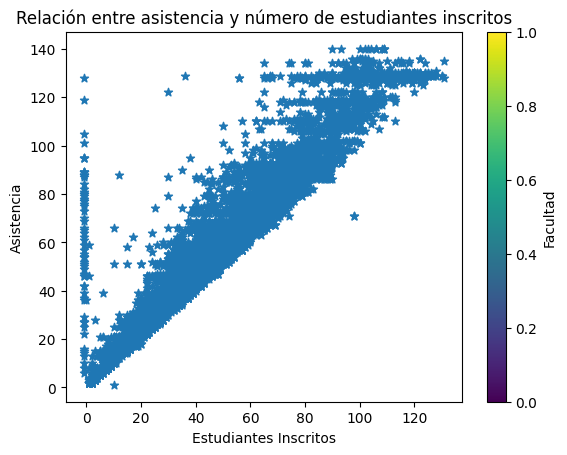

In [6]:
# Gráfico de dispersión de asistencia vs. estudiantes inscritos
plt.scatter(dfAsis['Asistencia'], dfAsis['Inscritos'],marker="*")
plt.xlabel('Estudiantes Inscritos')
plt.ylabel('Asistencia')
plt.title('Relación entre asistencia y número de estudiantes inscritos')
plt.colorbar(label='Facultad')
plt.show()

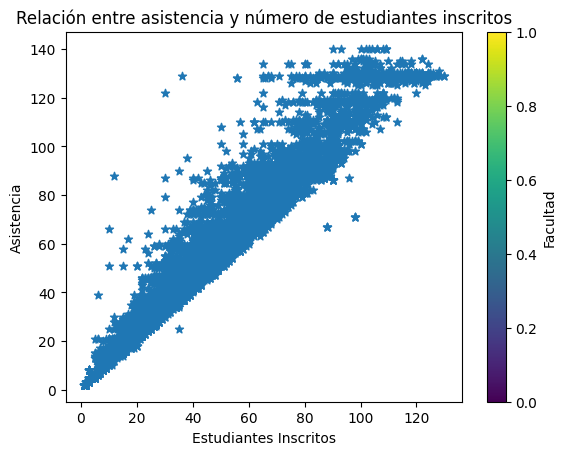

In [31]:
# Gráfico de dispersión de asistencia vs. estudiantes inscritos
plt.scatter(dfAsis['Asistencia'], dfAsis['Inscritos'],marker="*")
plt.xlabel('Estudiantes Inscritos')
plt.ylabel('Asistencia')
plt.title('Relación entre asistencia y número de estudiantes inscritos')
plt.colorbar(label='Facultad')
plt.show()

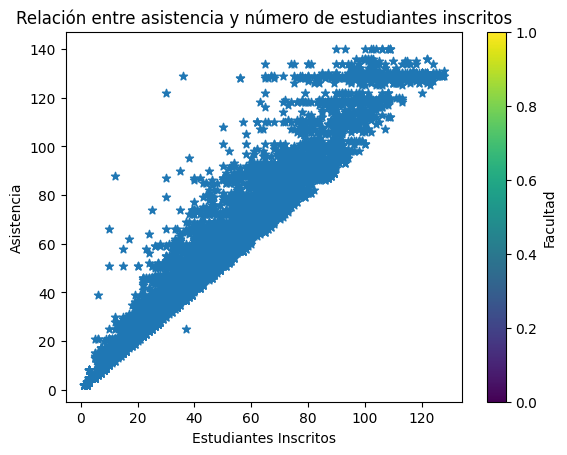

In [50]:
# Gráfico de dispersión de asistencia vs. estudiantes inscritos
plt.scatter(dfAsis['asistencia'], dfAsis['inscritos'],marker="*")
plt.xlabel('Estudiantes Inscritos')
plt.ylabel('Asistencia')
plt.title('Relación entre asistencia y número de estudiantes inscritos')
plt.colorbar(label='Facultad')
plt.show()

>`> Transformación de datos`

`vistaasistencias`

In [30]:

# cambiando el valor de la asistencia por valor minimo si el valor de la asistencia 
# es mayor al de los inscritos
for index, row in dfAsis.iterrows():
    codigo = row['codigo']
    horario = row['horario']
    seccion = row['seccion']
    dias = row['dias']
    asistencia = row['asistencia']
    inscritos = row['inscritos']
    
    if asistencia > inscritos:
        min_asistencia = dfAsis[(dfAsis['codigo'] == codigo) & (dfAsis['horario'] == horario) & (dfAsis['seccion'] == seccion) & (dfAsis['dias'] == dias)]['asistencia'].min()
        if not pd.isnull(min_asistencia):
            dfAsis.at[index, 'asistencia'] = min_asistencia
# # Mostrar el DataFrame modificado
# print(dfAsis)

In [31]:
#Seccionando todos los datos unicos para tener una mejor visualizacion "asistencia"
transAsis = dfAsis['asistencia']
registros_unicos = sorted(transAsis.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')

Sección 1:
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
---
Sección 2:
[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]
---
Sección 3:
[99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128]
---


In [33]:
# Definimos el umbral del valor que vamos a sustituir por la media segun si es menor al umbral
# y asistencia sea mayor a inscritos
umbral = 5

# agrupando los datos del DataFrame dfAsis según las columnas 'codigo', 'horario' y 'dias' 
# y luego calculamos la media y hacemos redondeo en la columna 'Asistencia' dentro de cada 
# grupo.
media_asistencias = dfAsis.groupby(['codigo', 'horario', 'dias'])['asistencia'].mean().round()


# Iterar sobre cada fila del DataFrame
for index, row in dfAsis.iterrows():
    codigo = row['codigo']
    horario = row['horario']
    dias = row['dias']
    asistencia = row['asistencia']
    inscritos = row['inscritos']

    # Verificar si el valor está dentro del umbral
    if asistencia < umbral:
        # Verificar si cumple las condiciones de código, horario y días
        if (codigo, horario, dias) in media_asistencias.index:
            # Calcular la media de asistencias para el código, horario y días específicos
            media = media_asistencias[(codigo, horario, dias)]
            
            # Sustituir el valor dentro del umbral por la media de asistencias
            dfAsis.at[index, 'asistencia'] = media
        else:
            # No se encontró la combinación de código, horario y días en las medias calculadas
            # No se realiza ninguna sustitución
            pass

    # Verificar si la asistencia es mayor que los inscritos
    if asistencia > inscritos:
        # Obtener la asistencia más alta dentro del rango de opciones anteriores
        asistencia_maxima = dfAsis[(dfAsis['codigo'] == codigo) & (dfAsis['horario'] == horario) 
                                   & (dfAsis['dias'] == dias)]['asistencia'].max()
        
        # Sustituir el valor de asistencia por la asistencia máxima
        dfAsis.at[index, 'asistencia'] = asistencia_maxima
dfAsis.loc[:, 'asistencia'] = dfAsis['asistencia'].astype(int)

# dfAsis


In [34]:
#Seccionando todos los datos unicos para tener una mejor visualizacion
transAsis = dfAsis['asistencia']
registros_unicos = sorted(transAsis.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')

Sección 1:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
---
Sección 2:
[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
---
Sección 3:
[101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128]
---


In [35]:
# Calcular la columna de Inasistencia
dfAsis = dfAsis.assign(inasistencia=dfAsis['inscritos'] - dfAsis['asistencia'])
# dfAsis.loc[:, 'inasistencia'] = dfAsis['inscritos'] - dfAsis['asistencia']

# dfAsis['inasistencia'] = dfAsis['inscritos'] - dfAsis['asistencia']

# Mostrar el DataFrame resultante
# dfAsis

In [36]:
#Seccionando todos los datos unicos para tener una mejor visualizacion
transAsis = dfAsis['inasistencia']
registros_unicos = sorted(transAsis.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')

Sección 1:
[-43, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
---
Sección 2:
[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 69, 72, 76, 92, 93]
---


In [37]:
# Reemplazar los rangos de los horarios por "mañana" y "tarde"
dfAsis['horario'] = dfAsis['horario'].apply(lambda x: 'mañana' if int(x[:2]) < 12 else 'tarde')
# Verificar los resultados
# dfAsis

In [38]:
#Seccionando todos los datos unicos para tener una mejor visualizacion
transAsis = dfAsis['horario']
registros_unicos = sorted(transAsis.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')
dfAsis

Sección 1:
['mañana', 'tarde']
---


,fecha,codigo,facultad,area,materia,seccion,horario,dias,inscritos,asistencia,modalidad,inasistencia
0,2023-01-19,DPCM1-D,Fac_Der,DERECHO,DERECHO PROCESAL CIVIL Y MERCANTIL I,1,mañana,Ma-Jue,75,70,EN LINEA,5
1,2023-01-19,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,6,mañana,Ma-Jue,44,26,PRESENCIAL,18
...,...,...,...,...,...,...,...,...,...,...,...,...
9378,2023-03-07,REA1-A,Fac_CiSo,ANTROPOLOGIA,REALIDAD NACIONAL,20,mañana,Ma-Jue,88,76,PRESENCIAL,12
9379,2023-04-11,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,1,mañana,Ma-Jue,88,80,PRESENCIAL,8


In [39]:
# Creando diccionario para mapear meses
meses = {
    '01': 'ENERO',
    '02': 'FEBRERO',
    '03': 'MARZO',
    '04': 'ABRIL',
    '05': 'MAYO',
    '06': 'JUNIO'
}

dfAsis['fecha'] = pd.to_datetime(dfAsis['fecha']).dt.strftime('%m-%Y')
dfAsis['fecha'] = dfAsis['fecha'].str.split('-', expand=True)[0].map(meses) + ' ' + dfAsis['fecha'].str.split('-', expand=True)[1]
# Verificar los resultados
# dfAsis

In [40]:
#Seccionando todos los datos unicos para tener una mejor visualizacion
transAsis = dfAsis['fecha']
registros_unicos = sorted(transAsis.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')

Sección 1:
['ABRIL 2023', 'ENERO 2023', 'FEBRERO 2023', 'MARZO 2023']
---


In [41]:
# Asegurarse de tener importada la librería pandas (import pandas as pd) antes de ejecutar este código

# Verificar si la asistencia es mayor a los inscritos y sustituir el valor
for index, row in dfAsis.iterrows():
    codigo = row['codigo']
    horario = row['horario']
    dias = row['dias']
    asistencia = row['asistencia']
    inscritos = row['inscritos']
    
    if asistencia > inscritos:
        # Verificar si el código corresponde con el día y horario específico
        media_asistencias = dfAsis[(dfAsis['codigo'] == codigo) & (dfAsis['horario'] == horario)
                                    & (dfAsis['dias'] == dias)]['asistencia'].mean().round()
        if not pd.isnull(media_asistencias):
            # Convertir el valor de asistencia a entero eliminando los decimales
            media_asistencias = int(media_asistencias)
            # Sustituir el valor de asistencia por la media
            dfAsis.at[index, 'asistencia'] = media_asistencias
# Convertir la columna "Asistencia" a tipo de datos entero
dfAsis['asistencia'] = dfAsis['asistencia'].astype(int)

In [42]:
transAsis = dfAsis['inasistencia']
registros_unicos = sorted(transAsis.drop_duplicates())  # Verificando registros únicos

secciones = [registros_unicos[i:i+50] for i in range(0, len(registros_unicos), 50)]

for i, seccion in enumerate(secciones):
    print(f"Sección {i+1}:")
    print(seccion)
    print('---')

Sección 1:
[-43, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
---
Sección 2:
[49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 69, 72, 76, 92, 93]
---


In [43]:
# Mostrar el dataframe modificado completo
dfAsis

,fecha,codigo,facultad,area,materia,seccion,horario,dias,inscritos,asistencia,modalidad,inasistencia
0,ENERO 2023,DPCM1-D,Fac_Der,DERECHO,DERECHO PROCESAL CIVIL Y MERCANTIL I,1,mañana,Ma-Jue,75,70,EN LINEA,5
1,ENERO 2023,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,6,mañana,Ma-Jue,44,26,PRESENCIAL,18
...,...,...,...,...,...,...,...,...,...,...,...,...
9378,MARZO 2023,REA1-A,Fac_CiSo,ANTROPOLOGIA,REALIDAD NACIONAL,20,mañana,Ma-Jue,88,76,PRESENCIAL,12
9379,ABRIL 2023,ALG1-E,Fac_InCa,INFORMATICA,ALGORITMOS I,1,mañana,Ma-Jue,88,80,PRESENCIAL,8


>`> Estadísticas generadas`

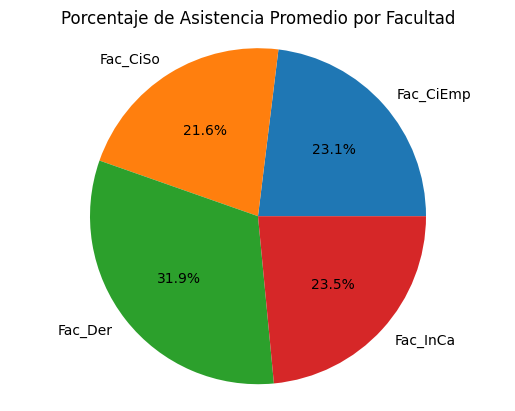

In [46]:
# Gráfico de pastel de la asistencia agrupados por facultad
asistencia_promedio_facultad = dfAsis.groupby('facultad')['inasistencia'].mean()

plt.pie(asistencia_promedio_facultad, labels=asistencia_promedio_facultad.index, 
        autopct='%1.1f%%')
plt.title('Porcentaje de Asistencia Promedio por Facultad')
plt.axis('equal')
plt.show()

`vistaasistencias`

01- Cantidad promedio de asistencias e inasistencias por fecha
###### lo que se muestra en el grafico es una comparativa de cuanta gente asiste por facultad y como a razon del tiempo esa asistencia puede fluctuar
02- Cantidad promedio de estudiantes inscritos por modalidad
###### cual modalidad es mas elegida
03- ¿Cuál es la cantidad promedio de estudiantes inscritos por área?
###### nos muestra que area es la que los estudiantes mas frefieren elegir como campo de estudio
04- ¿Cuál es la proporción de estudiantes que asisten en cada modalidad de enseñanza?
###### de esta forma sabremos cual modalidad prefieren estudiar los estudiantes
05- ¿Cuál es la proporción de estudiantes que elegijen un area de estudio segun la modalidad de enseñanza??
###### este grafico nos muestra en que modalidad los estudiantes prefieren estudiar dependiendo del area de estudio
06- ¿cual es la asistencia de cada día segun el horario?
###### de esta forma se vera cual es la regularidad con la que los estudiantes asisten y cual es el horario mas elegido por ellos
07- Promedio de asistencia e inasistencias por facultad
###### de esta forma sabremos que facultad es la que se mantiene en el tiempo y cual es la que mayor inasistencia tiene
08- Cantidad de Estudiantes Inscritos por Materia, según Área y Modalidad
###### en este grafico nos mostraria que modalidad es la mas elegida segun la materia
09- Promedio de Inasistencias por Modalidad
###### nos muestra la comparativa de cuan modo existe mayor afluencia de inasistencia
10-promedio de inscritos por modalidad y horario 
###### cual es la preferencia de los horarios segun la modalidad

>`> Presentación de resultados` 

`vistaasistencias`

>Cantidad promedio de asistencias e inasistencias por fecha

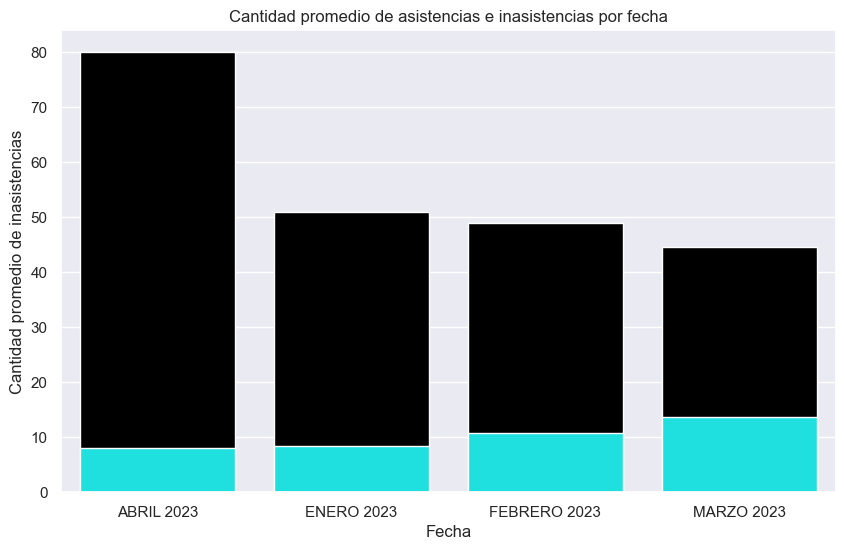

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por fecha y calcular el promedio de asistencias e inasistencias
fecha_avg_asistencias = dfAsis.groupby('fecha')['asistencia'].mean()
fecha_avg_inasistencias = dfAsis.groupby('fecha')['inasistencia'].mean()

# Crear la figura y el subgráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar el gráfico de barra de asistencias
sns.barplot(x=fecha_avg_asistencias.index, y=fecha_avg_asistencias.values, color=colors[6], ax=ax)
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad promedio de asistencias')
ax.set_title('Cantidad promedio de asistencias por fecha')

# Graficar el gráfico de barra de inasistencias
sns.barplot(x=fecha_avg_inasistencias.index, y=fecha_avg_inasistencias.values, color=colors[3], ax=ax)
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad promedio de inasistencias')
ax.set_title('Cantidad promedio de asistencias e inasistencias por fecha')

# Mostrar el gráfico
plt.show()

>Cantidad promedio de estudiantes inscritos por modalidad

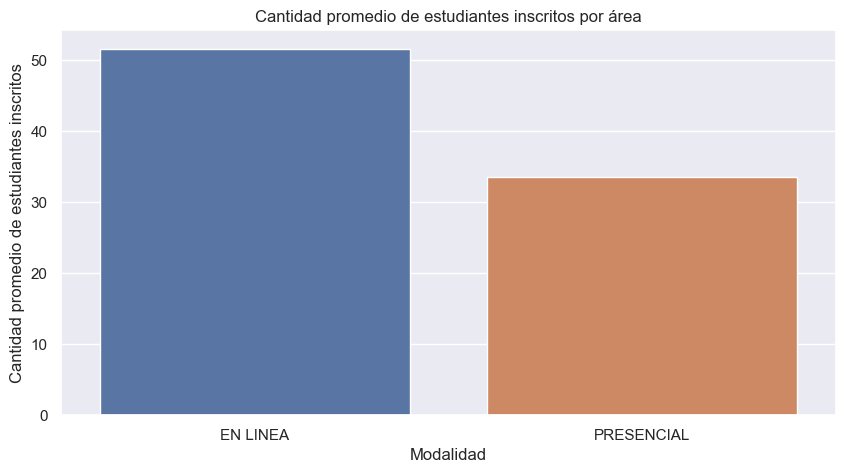

In [201]:
# Calcular el promedio de estudiantes inscritos por área
area_avg_inscritos = dfAsis.groupby('modalidad')['inscritos'].mean().reset_index()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 5))

# Graficar el gráfico de barras
sns.barplot(x='modalidad', y='inscritos', data=area_avg_inscritos)

# Agregar etiquetas y título
plt.xlabel('Modalidad')
plt.ylabel('Cantidad promedio de estudiantes inscritos')
plt.title('Cantidad promedio de estudiantes inscritos por modalidad')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()


>¿Cuál es la cantidad promedio de estudiantes inscritos por área?

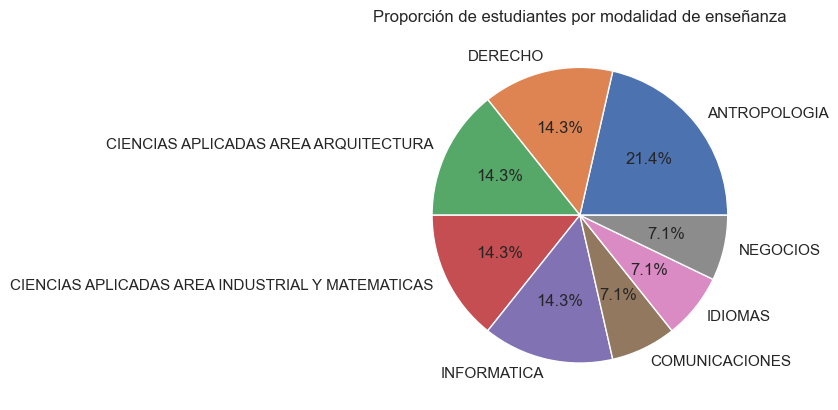

In [198]:
modalidad_count = dfAsis['area'].value_counts()
proporciones = modalidad_count / dfAsis['area'].count()
labels = proporciones.index
plt.pie(proporciones, labels=labels, autopct='%1.1f%%')
plt.title('Proporción de estudiantes por modalidad de enseñanza')
plt.show()

>¿Cuál es la proporción de estudiantes que asisten en cada modalidad de enseñanza?

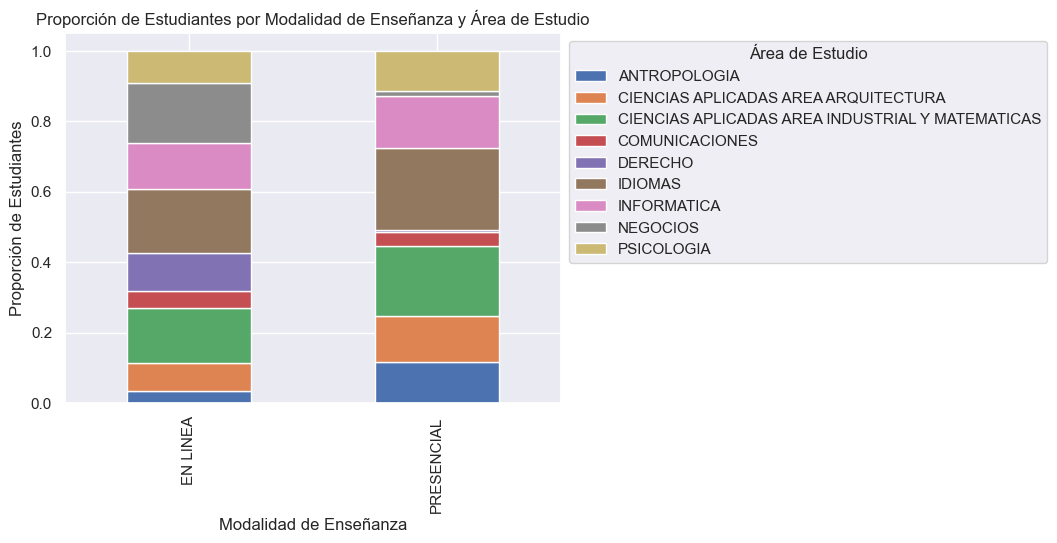

In [137]:
# Agrupa los datos por la columna de modalidad de enseñanza y área de estudio, y cuenta 
# la cantidad de estudiantes en cada grupo:
grupo_modalidad_area = dfAsis.groupby(['modalidad', 'area']).size()
# Calcula la proporción dividiendo la cantidad de estudiantes en cada grupo entre el total 
# de estudiantes en esa modalidad de enseñanza:
proporciones = grupo_modalidad_area / grupo_modalidad_area.groupby(level=0).sum()
proporciones.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Modalidad de Enseñanza')
plt.ylabel('Proporción de Estudiantes')
plt.title('Proporción de Estudiantes por Modalidad de Enseñanza y Área de Estudio')
plt.legend(title='Área de Estudio', bbox_to_anchor=(1, 1))
plt.show()

>¿Cuál es la proporción de estudiantes que elegijen un area de estudio segun la modalidad de enseñanza?

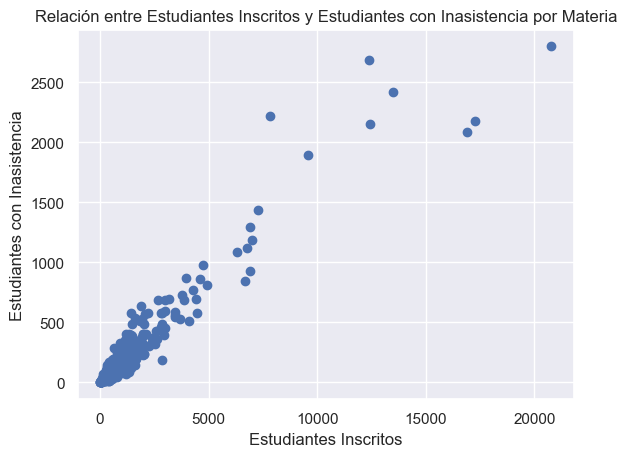

In [142]:
# Agrupa los datos por materia y calcula la suma de estudiantes inscritos y 
# la cantidad de estudiantes con inasistencia en cada materia:
grupo_materia = dfAsis.groupby('materia')[['inscritos', 'inasistencia']].sum()
# Calcula la proporción de estudiantes con inasistencia dividiendo la cantidad 
# de estudiantes con inasistencia entre el número de estudiantes inscritos:
grupo_materia['proporcion_inasistencia'] = grupo_materia['inasistencia'] / grupo_materia['inscritos']
# Grafica la relación utilizando un gráfico de dispersión o de barras:
plt.scatter(grupo_materia['inscritos'], grupo_materia['inasistencia'])
plt.xlabel('Estudiantes Inscritos')
plt.ylabel('Estudiantes con Inasistencia')
plt.title('Relación entre Estudiantes Inscritos y Estudiantes con Inasistencia por Materia')
plt.show()

>¿cual es la asistencia de cada día segun el horario?

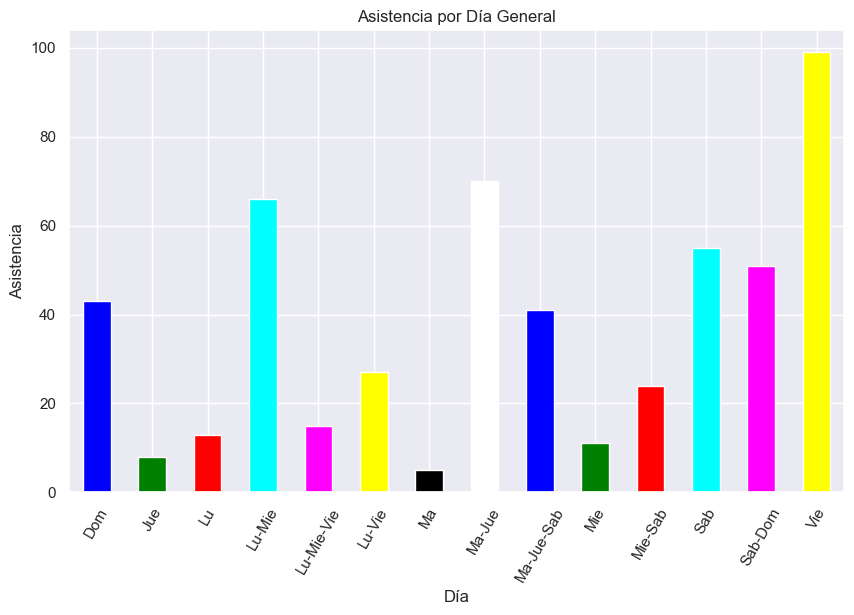

In [156]:
# Elimina los valores duplicados de la columna "dias" utilizando el método drop_duplicates()
dfAsis = dfAsis.drop_duplicates(subset=['dias'])

# Agrupa los datos por "dias" y calcula la suma de asistencia en cada día 
# utilizando el método groupby() y la función sum():
asistencia_por_dia = dfAsis.groupby('dias')['asistencia'].mean()

# Genera el gráfico de barras con varios colores
plt.figure(figsize=(10, 6))
asistencia_por_dia.plot(kind='bar', color=colors)
plt.xlabel('Día')
plt.ylabel('Asistencia')
plt.title('Asistencia por Día General')
plt.xticks(rotation=60)
plt.show()

>Promedio de asistencia e inasistencias por facultad

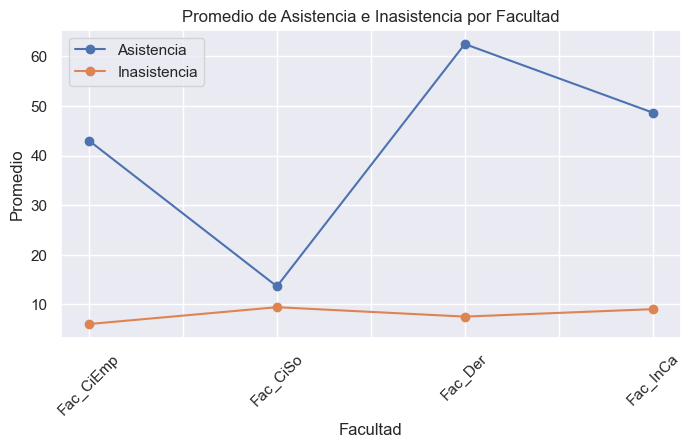

In [168]:
# Agrupar los datos por facultad y calcular el promedio de asistencia y de inasistencia
promedio_asistencia_facultad = dfAsis.groupby('facultad')['asistencia'].mean()
promedio_inasistencia_facultad = dfAsis.groupby('facultad')['inasistencia'].mean()

# Generar el gráfico de líneas del promedio de asistencia y de inasistencia por facultad
plt.figure(figsize=(8, 4))
promedio_asistencia_facultad.plot(kind='line', marker='o', label='Asistencia')
promedio_inasistencia_facultad.plot(kind='line', marker='o', label='Inasistencia')
plt.xlabel('Facultad')
plt.ylabel('Promedio')
plt.title('Promedio de Asistencia e Inasistencia por Facultad')
plt.legend()
plt.xticks(rotation=45)
plt.show()




>Cantidad de Estudiantes Inscritos por Materia, según Área y Modalidad

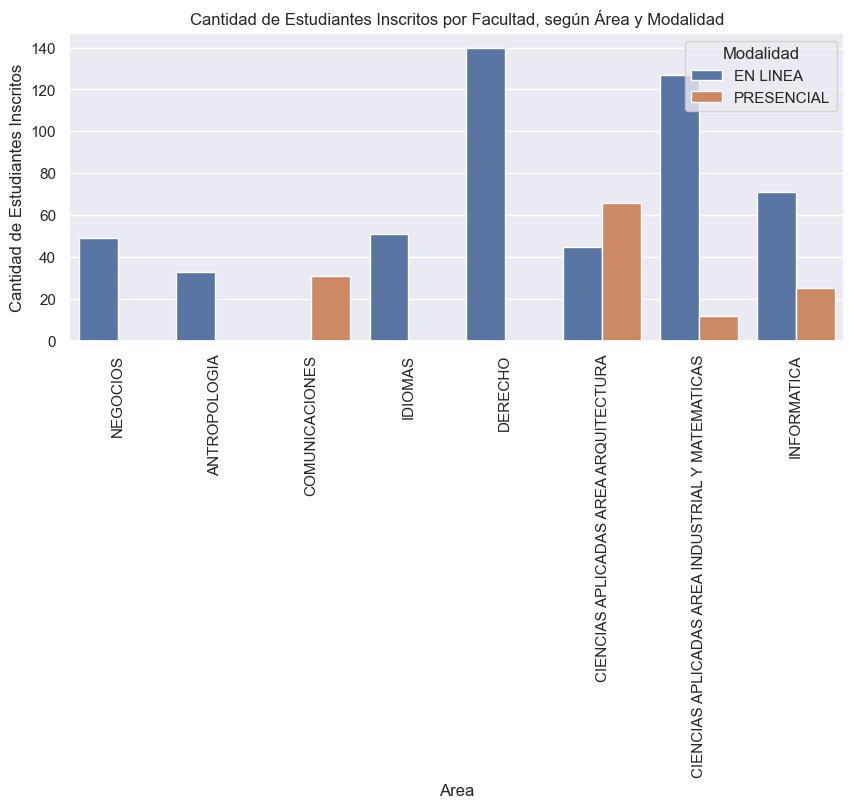

In [203]:
# Agrupar los datos por materia, área y modalidad de enseñanza y calcular la suma de estudiantes inscritos
inscritos_por_materia_area_modalidad = dfAsis.groupby(['facultad', 'area', 'modalidad'])['inscritos'].sum().reset_index()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 4))

# Crear el gráfico de barras agrupadas
sns.barplot(x='area', y='inscritos', hue='modalidad', data=inscritos_por_materia_area_modalidad)

# Configurar etiquetas y título
plt.xlabel('Area')
plt.ylabel('Cantidad de Estudiantes Inscritos')
plt.title('Cantidad de Estudiantes Inscritos por Facultad, según Área y Modalidad')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Mostrar la leyenda
plt.legend(title='Modalidad')

# Mostrar el gráfico
plt.show()

>Promedio de Inasistencias por Modalidad

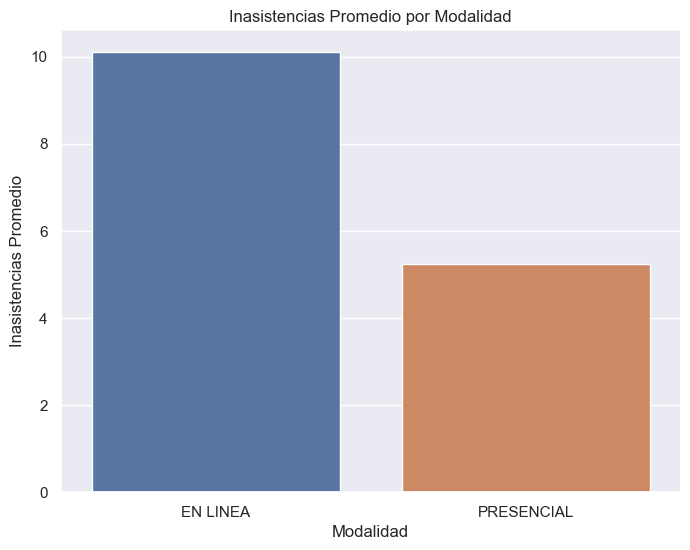

In [189]:
# Agrupar los datos por modalidad y calcular la media de inasistencias en cada grupo
promedio_inasistencias_modalidad = dfAsis.groupby('modalidad')['inasistencia'].mean().reset_index()

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar el promedio de inasistencias por modalidad
sns.barplot(x='modalidad', y='inasistencia', data=promedio_inasistencias_modalidad, ax=ax)

# Configurar etiquetas de los ejes y título
ax.set_xlabel('Modalidad')
ax.set_ylabel('Inasistencias Promedio')
ax.set_title('Promedio de Inasistencias por Modalidad')

# Mostrar el gráfico
plt.show()

>promedio de inscritos por modalidad y horario 

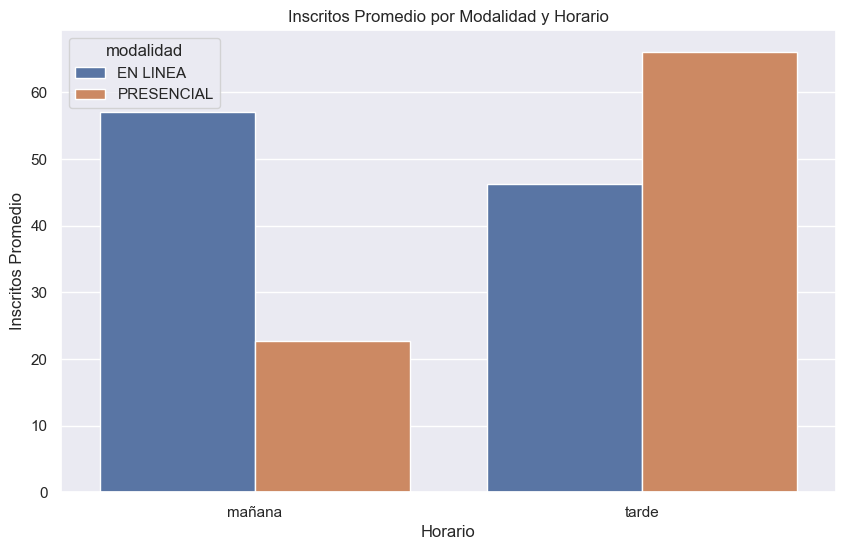

In [197]:
# Agrupar los datos por modalidad y horario, y calcular el promedio de estudiantes inscritos en cada grupo
promedio_inscritos = dfAsis.groupby(['modalidad', 'horario'])['inscritos'].mean().reset_index()

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar el promedio de inscritos por modalidad y horario
sns.barplot(x='horario', y='inscritos', hue='modalidad', data=promedio_inscritos, ax=ax)

# Configurar etiquetas de los ejes y título
ax.set_xlabel('Horario')
ax.set_ylabel('Inscritos Promedio')
ax.set_title('Inscritos Promedio por Modalidad y Horario')

# Mostrar el gráfico
plt.show()

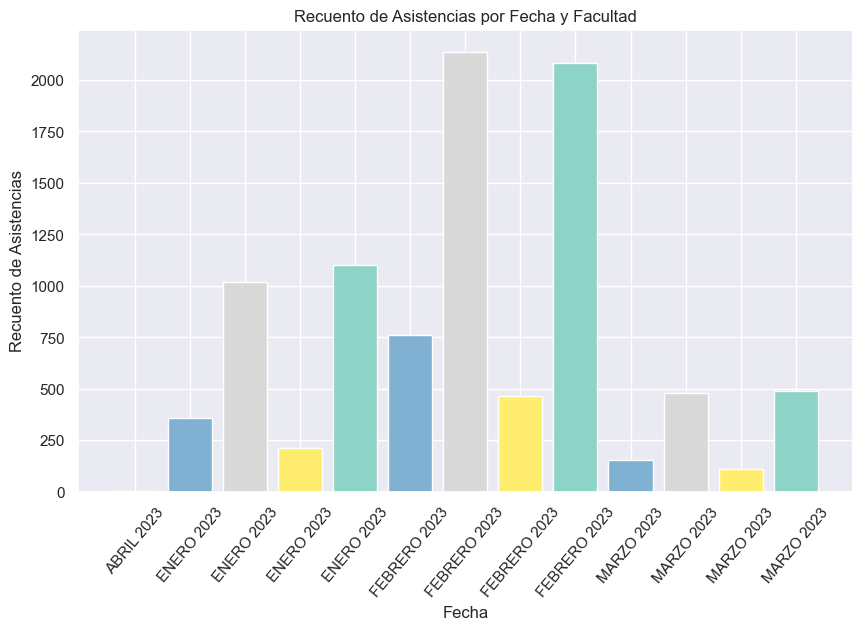

In [92]:
# Agrupar por fecha y facultad y contar las asistencias en cada grupo
conteo_asistencias = dfAsis.groupby(['fecha', 'facultad'])['asistencia'].count()

# Reiniciar el índice para facilitar el acceso a los datos
conteo_asistencias = conteo_asistencias.reset_index()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Obtener la lista de fechas y asignar un color a cada una
fechas = conteo_asistencias['fecha'].unique()
colores = plt.cm .Set3(np.linspace(0, 1, len(fechas)))

# Graficar el recuento de asistencias por fecha y facultad
plt.bar(range(len(conteo_asistencias)), conteo_asistencias['asistencia'],color=colores)

# Configurar las etiquetas del eje x
plt.xticks(range(len(conteo_asistencias)), conteo_asistencias['fecha'], rotation=50)

# Agregar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Recuento de Asistencias')
plt.title('Recuento de Asistencias por Fecha y Facultad')

# Mostrar el gráfico
plt.show()




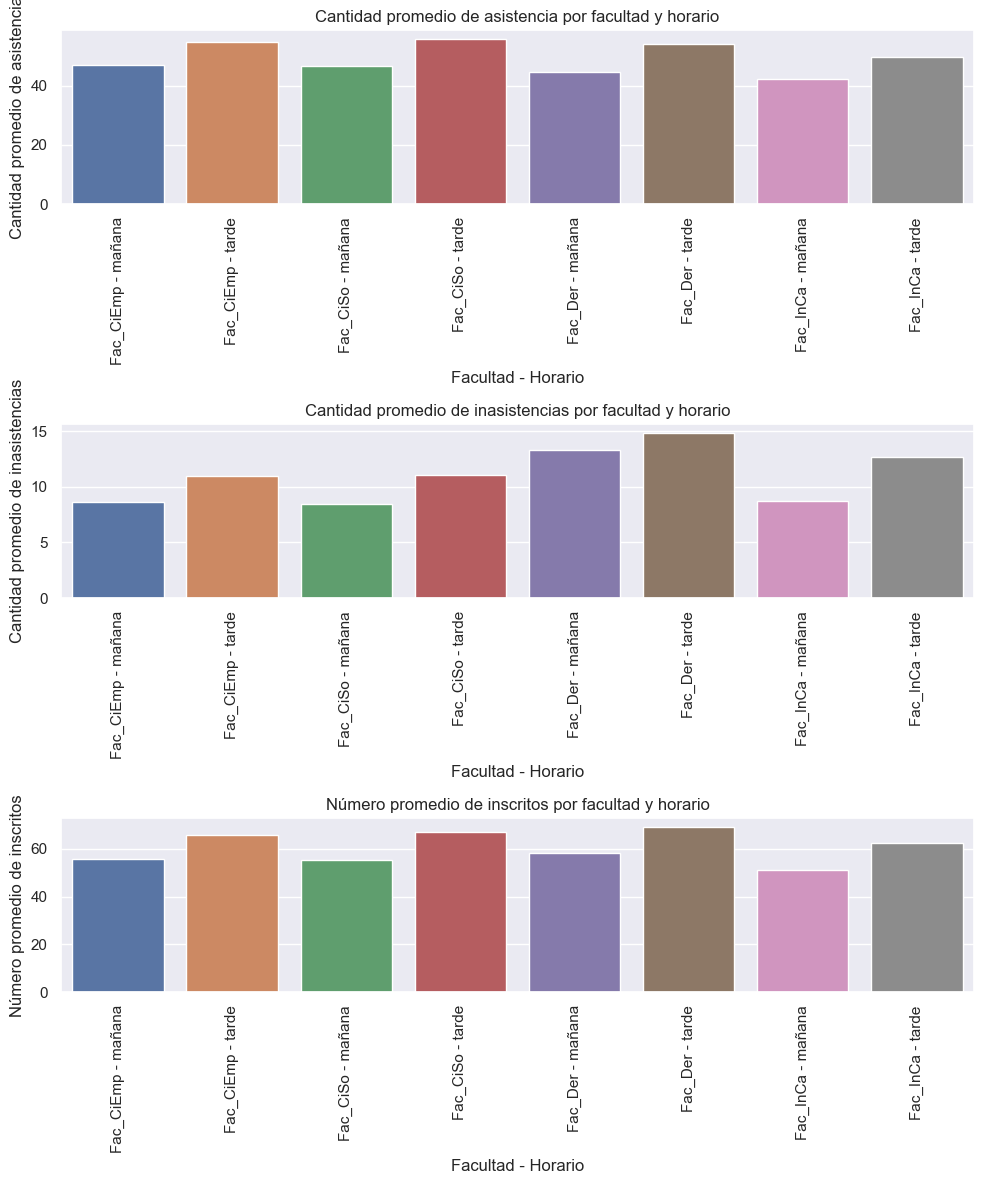

In [119]:
# Agrupar por facultad y horario y calcular el promedio de asistencias, inasistencias e inscritos
facultad_horario_avg_asistencia = dfAsis.groupby(['facultad', 'horario'])['asistencia'].mean().reset_index()
facultad_horario_avg_inasistencias = dfAsis.groupby(['facultad', 'horario'])['inasistencia'].mean().reset_index()
facultad_horario_avg_inscritos = dfAsis.groupby(['facultad', 'horario'])['inscritos'].mean().reset_index()

# Crear la figura y los subgráficos
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Concatenar los nombres de facultad y horario en una nueva columna 'facultad_horario'
facultad_horario_avg_asistencia['facultad_horario'] = facultad_horario_avg_asistencia.apply(lambda row: f"{row['facultad']} - {row['horario']}", axis=1)

# Graficar el gráfico de barra de asistencia por horario
sns.barplot(x='facultad_horario', y='asistencia', data=facultad_horario_avg_asistencia, ax=ax1)
ax1.set_xlabel('Facultad - Horario')
ax1.set_ylabel('Cantidad promedio de asistencia')
ax1.set_title('Cantidad promedio de asistencia por facultad y horario')
ax1.tick_params(axis='x', rotation=90)

# Concatenar los nombres de facultad y horario en una nueva columna 'facultad_horario'
facultad_horario_avg_inasistencias['facultad_horario'] = facultad_horario_avg_inasistencias.apply(lambda row: f"{row['facultad']} - {row['horario']}", axis=1)

# Graficar el gráfico de barra de inasistencias por horario
sns.barplot(x='facultad_horario', y='inasistencia', data=facultad_horario_avg_inasistencias, ax=ax2)
ax2.set_xlabel('Facultad - Horario')
ax2.set_ylabel('Cantidad promedio de inasistencias')
ax2.set_title('Cantidad promedio de inasistencias por facultad y horario')
ax2.tick_params(axis='x', rotation=90)

# Concatenar los nombres de facultad y horario en una nueva columna 'facultad_horario'
facultad_horario_avg_inscritos['facultad_horario'] = facultad_horario_avg_inscritos.apply(lambda row: f"{row['facultad']} - {row['horario']}", axis=1)

# Graficar el gráfico de barra de inscritos por horario
sns.barplot(x='facultad_horario', y='inscritos', data=facultad_horario_avg_inscritos, ax=ax3)
ax3.set_xlabel('Facultad - Horario')
ax3.set_ylabel('Número promedio de inscritos')
ax3.set_title('Número promedio de inscritos por facultad y horario')
ax3.tick_params(axis='x', rotation=90)

# Ajustar la distancia entre los subgráficos
fig.tight_layout()

# Mostrar el gráfico
plt.show()

> ### `EXPORTACIÓN DE DATOS`

In [44]:
#dfExam.to_csv('exam_sinIndices.csv',sep=";",index=False,encoding="utf-8")#crea un archivo CSV EXPORTANDO el trabajo de limpieza de la BD
dfAsis.to_csv('Asis_sinIndices.csv',sep=";",index=False,encoding="utf-8")#crea un archivo CSV EXPORTANDO el trabajo de limpieza de la BD